# 기상 특성에 따른 안개 발생 진단

## 데이터 설명
- 컬럼

    - `Year` : 년도
    - `Month` : 월
    - `Day` : 일
    - `Time` : 시간 (0 ~ 23)
    - `Minute` : 분 (10분 단위)
    - `STN_ID` : 지점 번호
    - `WS10(deg)` : 10분 평균 풍향, 단위: deg
    - `WS10(m/s)` : 10분 평균 풍속, 단위: m/s
    - `TA` : 1분 평균 기온 10분 주기, 단위: C
    - `RE` : 강수 유무 (0:무강수, 1:강수)
    - `HM` : 1분 평균 상대 습도 10분 주기, 단위: %
    - `sun10` : 1분 일사량 10분단위 합계, 단위: MJ
    - `TS` : 1분 평균 지면온도 10분 주기, 단위: C
    - `VIS1` : 1분 평균 시정 10분 주기, 단위: C (VIS1 변수는 시정 구간을 알 수 있는 변수로 검증 데이터에서는 제외)
    - `class` : 시정 구간

- 시정 계급 기준 (비고: 안개의 기준)

    - `1` : 0 < 시정 < 200
    - `2` : 200 <= 시정 < 500
    - `3` : 500 <= 시정 < 1000
    - `4` : 1000 <= 시정


## 데이터 불러오기

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# 데이터셋 경로 지정
train_path = "C:/Users/aryij/Downloads/fog_python/fog_train.csv"
test_path = "C:/Users/aryij/Downloads/fog_python/fog_test.csv"

In [4]:
# 데이터셋 불러오기
train_df = pd.read_csv(train_path, index_col=0)
test_df = pd.read_csv(test_path, index_col=0)

In [5]:
train_df.head()

,fog_train.year,fog_train.month,fog_train.day,fog_train.time,fog_train.minute,fog_train.stn_id,fog_train.ws10_deg,fog_train.ws10_ms,fog_train.ta,fog_train.re,fog_train.hm,fog_train.sun10,fog_train.ts,fog_train.vis1,fog_train.class
1,I,1,1,0,10,AA,0.0,0.0,-6.4,0.0,38.9,0.0,-2.8,20000,4
2,I,1,1,0,20,AA,0.0,0.0,-6.3,0.0,37.9,0.0,-2.7,20000,4
3,I,1,1,0,30,AA,0.0,0.0,-6.3,0.0,40.0,0.0,-2.6,20000,4
4,I,1,1,0,40,AA,27.8,0.4,-6.2,0.0,39.5,0.0,-2.6,20000,4
5,I,1,1,0,50,AA,59.7,0.5,-6.1,0.0,39.8,0.0,-2.5,20000,4


In [6]:
test_df.head()

,fog_train.year,fog_train.month,fog_train.day,fog_train.time,fog_train.minute,fog_train.stn_id,fog_train.ws10_deg,fog_train.ws10_ms,fog_train.ta,fog_train.re,fog_train.hm,fog_train.sun10,fog_train.ts,fog_train.vis1,fog_train.class
1,I,1,1,0,10,AA,0.0,0.0,-6.4,0.0,38.9,0.0,-2.8,20000,4
2,I,1,1,0,20,AA,0.0,0.0,-6.3,0.0,37.9,0.0,-2.7,20000,4
3,I,1,1,0,30,AA,0.0,0.0,-6.3,0.0,40.0,0.0,-2.6,20000,4
4,I,1,1,0,40,AA,27.8,0.4,-6.2,0.0,39.5,0.0,-2.6,20000,4
5,I,1,1,0,50,AA,59.7,0.5,-6.1,0.0,39.8,0.0,-2.5,20000,4


In [7]:
train_df.shape, test_df.shape

((3156459, 15), (3156459, 15))

## 데이터 확인

In [8]:
train_df.describe(include="all")

,fog_train.year,fog_train.month,fog_train.day,fog_train.time,fog_train.minute,fog_train.stn_id,fog_train.ws10_deg,fog_train.ws10_ms,fog_train.ta,fog_train.re,fog_train.hm,fog_train.sun10,fog_train.ts,fog_train.vis1,fog_train.class
count,3156459,3.156459e+06,3.156459e+06,3.156459e+06,3.156459e+06,3156459,3.156459e+06,3.156459e+06,3.156459e+06,3.156459e+06,3.156459e+06,3.156459e+06,3.156459e+06,3.156459e+06,3.156459e+06
unique,3,NaN,NaN,NaN,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,I,NaN,NaN,NaN,NaN,AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1054060,NaN,NaN,NaN,NaN,157823,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,6.521931e+00,1.573276e+01,1.150007e+01,2.500016e+01,NaN,1.852152e+02,1.999417e+00,1.328812e+01,-4.298995e-01,6.667729e+01,-1.288869e+00,1.282955e+01,1.963548e+04,3.246275e+00
std,NaN,3.448969e+00,8.801320e+00,6.922149e+00,1.707819e+01,NaN,1.072184e+02,4.721616e+00,1.100537e+01,6.929268e+00,2.173623e+01,1.171355e+01,2.257327e+01,1.206407e+04,8.668957e+00
min,NaN,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,NaN,-9.990000e+01,-9.990000e+01,-9.990000e+01,-9.990000e+01,-9.990000e+01,-9.990000e+01,-9.990000e+01,-9.900000e+01,-9.900000e+01
25%,NaN,4.000000e+00,8.000000e+00,6.000000e+00,1.000000e+01,NaN,8.470000e+01,9.000000e-01,5.500000e+00,0.000000e+00,5.130000e+01,0.000000e+00,5.100000e+00,1.229700e+04,4.000000e+00
50%,NaN,7.000000e+00,1.600000e+01,1.200000e+01,3.000000e+01,NaN,2.094000e+02,1.800000e+00,1.430000e+01,0.000000e+00,6.870000e+01,0.000000e+00,1.570000e+01,2.000000e+04,4.000000e+00
75%,NaN,1.000000e+01,2.300000e+01,1.800000e+01,4.000000e+01,NaN,2.769000e+02,3.000000e+00,2.200000e+01,0.000000e+00,8.470000e+01,1.600000e-01,2.430000e+01,2.000000e+04,4.000000e+00


In [9]:
test_df.describe(include="all")

,fog_train.year,fog_train.month,fog_train.day,fog_train.time,fog_train.minute,fog_train.stn_id,fog_train.ws10_deg,fog_train.ws10_ms,fog_train.ta,fog_train.re,fog_train.hm,fog_train.sun10,fog_train.ts,fog_train.vis1,fog_train.class
count,3156459,3.156459e+06,3.156459e+06,3.156459e+06,3.156459e+06,3156459,3.156459e+06,3.156459e+06,3.156459e+06,3.156459e+06,3.156459e+06,3.156459e+06,3.156459e+06,3.156459e+06,3.156459e+06
unique,3,NaN,NaN,NaN,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,I,NaN,NaN,NaN,NaN,AA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1054060,NaN,NaN,NaN,NaN,157823,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,6.521931e+00,1.573276e+01,1.150007e+01,2.500016e+01,NaN,1.852152e+02,1.999417e+00,1.328812e+01,-4.298995e-01,6.667729e+01,-1.288869e+00,1.282955e+01,1.963548e+04,3.246275e+00
std,NaN,3.448969e+00,8.801320e+00,6.922149e+00,1.707819e+01,NaN,1.072184e+02,4.721616e+00,1.100537e+01,6.929268e+00,2.173623e+01,1.171355e+01,2.257327e+01,1.206407e+04,8.668957e+00
min,NaN,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,NaN,-9.990000e+01,-9.990000e+01,-9.990000e+01,-9.990000e+01,-9.990000e+01,-9.990000e+01,-9.990000e+01,-9.900000e+01,-9.900000e+01
25%,NaN,4.000000e+00,8.000000e+00,6.000000e+00,1.000000e+01,NaN,8.470000e+01,9.000000e-01,5.500000e+00,0.000000e+00,5.130000e+01,0.000000e+00,5.100000e+00,1.229700e+04,4.000000e+00
50%,NaN,7.000000e+00,1.600000e+01,1.200000e+01,3.000000e+01,NaN,2.094000e+02,1.800000e+00,1.430000e+01,0.000000e+00,6.870000e+01,0.000000e+00,1.570000e+01,2.000000e+04,4.000000e+00
75%,NaN,1.000000e+01,2.300000e+01,1.800000e+01,4.000000e+01,NaN,2.769000e+02,3.000000e+00,2.200000e+01,0.000000e+00,8.470000e+01,1.600000e-01,2.430000e+01,2.000000e+04,4.000000e+00


In [10]:
# train 데이터는 test 데이터와 동일하다
train_df.equals(test_df)

True

In [20]:
# train_df 컬럼들 앞에 있는 fog_train. <- 제거
train_df.columns = train_df.columns.str.replace("fog_train.", "")

In [21]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3156459 entries, 1 to 3156459
Data columns (total 15 columns):
 #   Column    Dtype  
---  ------    -----  
 0   year      object 
 1   month     int64  
 2   day       int64  
 3   time      int64  
 4   minute    int64  
 5   stn_id    object 
 6   ws10_deg  float64
 7   ws10_ms   float64
 8   ta        float64
 9   re        float64
 10  hm        float64
 11  sun10     float64
 12  ts        float64
 13  vis1      int64  
 14  class     int64  
dtypes: float64(7), int64(6), object(2)
memory usage: 385.3+ MB


In [22]:
# 결측치 확인
train_df.isnull().sum()

year        0
month       0
day         0
time        0
minute      0
stn_id      0
ws10_deg    0
ws10_ms     0
ta          0
re          0
hm          0
sun10       0
ts          0
vis1        0
class       0
dtype: int64

In [25]:
train_df["year"].unique()

array(['I', 'J', 'K'], dtype=object)

In [28]:
train_df["stn_id"].unique()

array(['AA', 'AB', 'AC', 'AD', 'AE', 'AF', 'AG', 'AH', 'BA', 'BB', 'BC',
       'BD', 'CA', 'CB', 'DA', 'DB', 'DC', 'EA', 'EB', 'EC'], dtype=object)

In [33]:
train_df["class"].unique()

array([  4,   1,   3,   2, -99], dtype=int64)

In [35]:
# class 원래 범위 1 ~ 4, 그러나 -99가 존재
# -99가 뭔지 확인해본다
train_df[train_df["class"]==-99].head()

,year,month,day,time,minute,stn_id,ws10_deg,ws10_ms,ta,re,hm,sun10,ts,vis1,class
7646,I,2,23,2,20,AA,272.0,1.3,-0.9,0.0,61.1,0.00,-1.0,-99,-99
7781,I,2,24,0,50,AA,140.7,1.2,2.1,0.0,59.5,0.00,0.8,-99,-99
16054,I,4,21,11,40,AA,271.7,7.0,9.2,0.0,42.8,0.32,16.7,-99,-99
16055,I,4,21,11,50,AA,276.4,6.0,9.3,0.0,43.4,0.26,19.0,-99,-99
16056,I,4,21,12,0,AA,268.4,5.9,9.5,0.0,41.7,0.48,21.1,-99,-99


In [48]:
# class = -99인 데이터의 year, month, stn_id, vis1 컬럼 확인
print(sorted(train_df[train_df["class"]==-99]["year"].unique()))
print(sorted(train_df[train_df["class"]==-99]["month"].unique()))
print(sorted(train_df[train_df["class"]==-99]["stn_id"].unique()))
print(sorted(train_df[train_df["class"]==-99]["vis1"].unique()))

['I', 'J', 'K']
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
['AA', 'AB', 'AC', 'AD', 'AE', 'AF', 'AG', 'AH', 'BA', 'BB', 'BC', 'BD', 'CA', 'CB', 'DA', 'DB', 'DC', 'EA', 'EB', 'EC']
[-99]


### class = -99인 데이터 비율

In [53]:
# class = -99인 것 count
class_99_cnt = train_df[train_df["class"]==-99].count()
total_cnt = train_df.count()
class_99_pct = round((class_99_cnt/total_cnt)*100, 1)

In [56]:
pct_99 = pd.concat([class_99_cnt, class_99_pct], axis=1, keys=["class_99", "Percent"])
pct_99

,class_99,Percent
year,22516,0.7
month,22516,0.7
day,22516,0.7
time,22516,0.7
minute,22516,0.7
stn_id,22516,0.7
ws10_deg,22516,0.7
ws10_ms,22516,0.7
ta,22516,0.7
re,22516,0.7


In [105]:
cnt_99 = train_df[train_df["class"]==-99].shape[0]
pct_99 = round((cnt_99/train_df.shape[0])*100, 2)

In [117]:
class_99_df = pd.DataFrame({"cnts" : [cnt_99], "percent" : [pct_99]}, index=["class_99"])
class_99_df

,cnts,percent
class_99,22516,0.71


c:\Users\aryij\anaconda3\envs\weather\Lib\site-packages\seaborn\categorical.py:645: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  g_vals = grouped_vals.get_group(g)


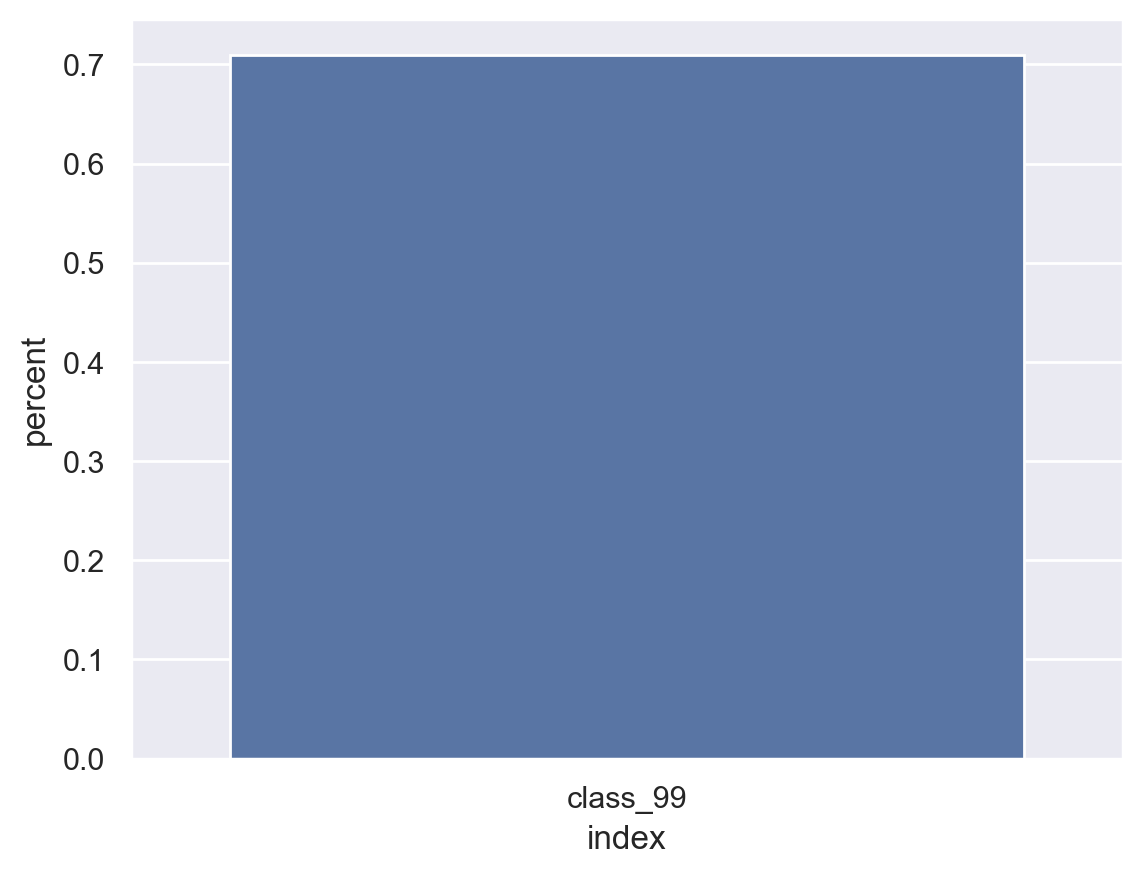

In [122]:
sns.barplot(x="index", y="percent", data=class_99_df.reset_index())
plt.show()